<a href="https://colab.research.google.com/github/LCaravaggio/ClaseTimeSeries/blob/main/Ejercicio5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import json

import requests
from requests.auth import HTTPBasicAuth

import pandas as pd

In [2]:
drive.mount('/content/drive', force_remount=True)
with open("/content/drive/My Drive/alphacast.json", 'r') as f:
    api_token= json.load(f)

Mounted at /content/drive


In [3]:
# Definir user key para la API
user_key = api_token["key"]

También es posible tomar dos series de un mismo dataset: 

In [4]:
# Merval y GGAL
ds='5816' # Equity Argentina
select1='71475' # ALUA
select2='71483' # EDD
select3='71484' # GGAL
equity = requests.get('https://api.alphacast.io/datasets/'+ds+'/data?apiKey='+user_key+'&%24select='+ select1 +'%2C'+ select2 + '%2C'+ select3 + '&$format=csv', auth=HTTPBasicAuth(user_key, ''))
open('equity.csv','wb').write(equity.content)
equity = pd.read_csv('equity.csv',delimiter = ',')

In [5]:
equity=equity.dropna()

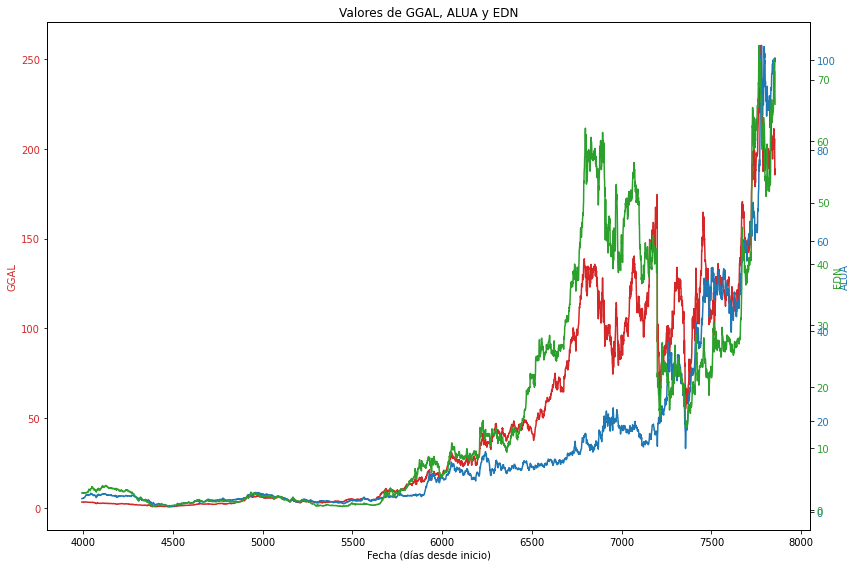

In [6]:
import matplotlib as mpl
%matplotlib inline
from matplotlib import pyplot as plt


mpl.rcParams['figure.figsize'] = (12,8)

time = equity.index

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Fecha (días desde inicio)')
ax1.set_ylabel('GGAL', color = color)
ax1.plot(time, equity.GGAL, color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

ax2 = ax1.twinx()  
ax3 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('ALUA', color = color) 
ax2.plot(time, equity.ALUA, color = color)
ax2.tick_params(axis = 'y', labelcolor = color)

color = 'tab:green'
ax3.set_ylabel('EDN', color = color) 
ax3.plot(time, equity.EDN, color = color)
ax3.tick_params(axis = 'y', labelcolor = color)

plt.title('Valores de GGAL, ALUA y EDN')

fig.tight_layout()  
plt.show()

In [7]:
equity=equity.drop(['Date', 'country'], axis=1)
equity=equity.dropna()

In [9]:
from statsmodels.tsa.vector_ar.vecm import VECM, select_order, select_coint_rank

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
# Si el estatadístico es menor que el valor crítico, entonces no se puede rechazar la H0 de que exista al menos un vector de cointegración

vec_rank = select_coint_rank(equity, det_order = 1, k_ar_diff = 1, method = 'trace', signif=0.01)
print(vec_rank.summary())

Johansen cointegration test using trace test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   3          42.94          41.08
  1   3          5.829          23.15
-------------------------------------


In [15]:
lag_order = select_order(data=equity, maxlags=10, deterministic="ci", seasons=4)

rank_test = select_coint_rank(equity, 0, 3, method="trace", signif=0.05)

model = VECM(equity, deterministic="ci", seasons=4,  coint_rank=rank_test.rank)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was pro

In [16]:
vecm_res = model.fit()

In [17]:
vecm_res.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
season1,0.0355,0.030,1.191,0.234,-0.023,0.094
season2,0.0036,0.030,0.119,0.905,-0.055,0.062
season3,0.0320,0.030,1.074,0.283,-0.026,0.090
L1.ALUA,0.1204,0.018,6.623,0.000,0.085,0.156
L1.EDN,0.0113,0.017,0.681,0.496,-0.021,0.044
L1.GGAL,-0.0162,0.005,-3.113,0.002,-0.026,-0.006
,coef,std err,z,P>|z|,[0.025,0.975]
season1,0.0390,0.039,1.008,0.313,-0.037,0.115
season2,0.0370,0.039,0.955,0.339,-0.039,0.113
season3,0.0156,0.039,0.402,0.688,-0.060,0.091
